In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, Embarked 에 NULL값이 있다 
다른 Column 값들은 Non-NULL 개수가 891

## 1. Sex

In [6]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


여자는 74% 생존
남자는 18% 생존

## 2. Pclass

In [7]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


1등급 객실 62% 생존 2등급 47% 3등급 24% 생존

In [8]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

1등급 객실의 여성생존자가 가장 많고 3등급객실의 남성사망자가 제일 많다

## 3. Age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


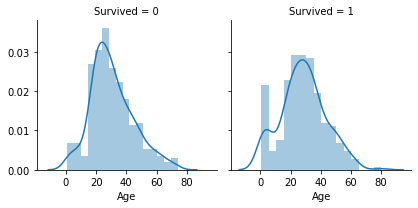

In [9]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

## 4.Pclass,Sex,Age

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


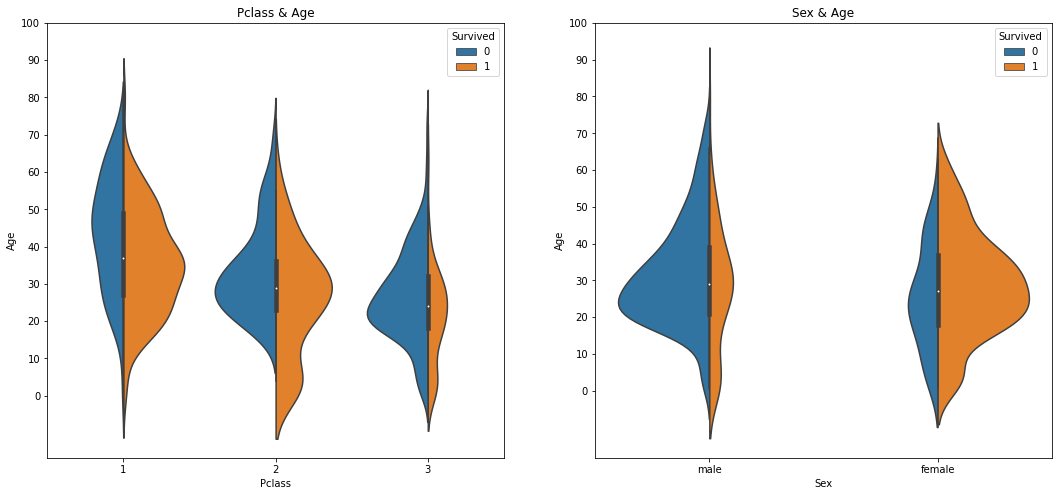

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass & Age')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex & Age')
ax[1].set_yticks(range(0,110,10))

plt.show()


## 5. Embarked

<AxesSubplot:xlabel='Embarked'>

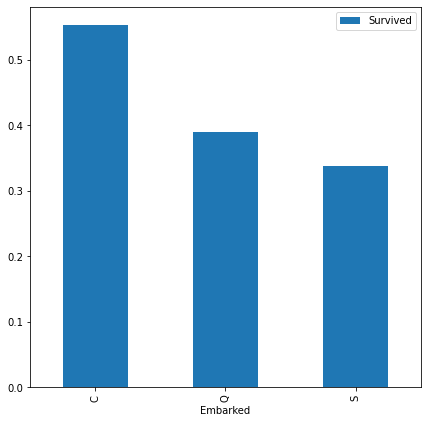

In [11]:
f,ax=plt.subplots(1,1,figsize=(7,7))
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

In [12]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

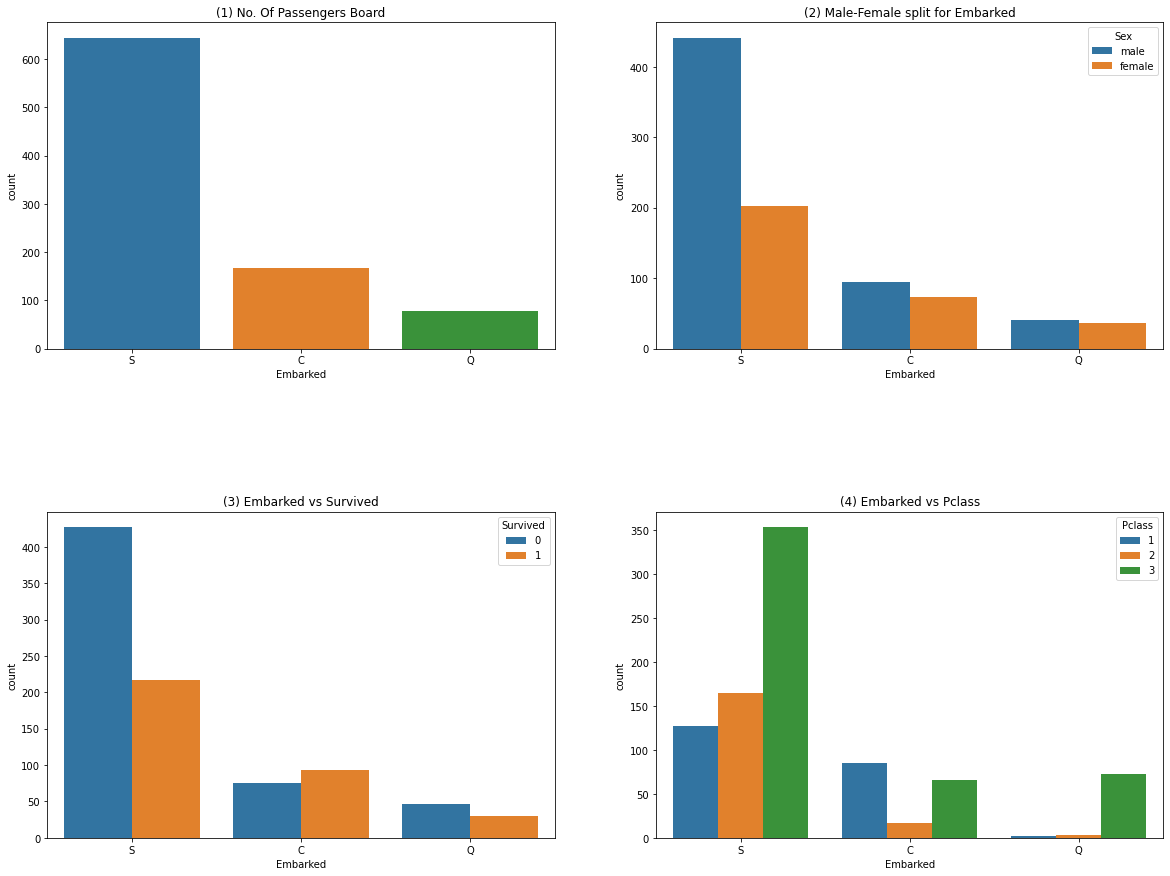

In [13]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Board')


sns.countplot('Embarked', hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked')

sns.countplot('Embarked', hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

#상하좌우간격
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## 6.Feature Engineering

In [14]:
train['Age'].isnull().sum()

177

In [15]:
train['Embarked'].isnull().sum()

2

In [16]:
train['Embarked'].fillna('S',inplace=True)

In [17]:
train['Embarked'].isnull().sum()

0

In [18]:
train['Age'].mean()

29.69911764705882

str.extract() 원하는 문자열 추출  Mr. Mrs. 등을 찾기 위해서!

In [19]:
train['first']=train['Name'].str.extract('([A-Za-z]+)\.')
test['first']=test['Name'].str.extract('([A-Za-z]+)\.')

In [20]:
train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [21]:
pd.crosstab(train['first'],train['Sex']).T.style.background_gradient(cmap='summer_r')

first,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
train['first'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

<AxesSubplot:xlabel='first'>

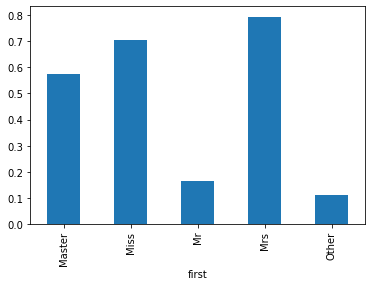

In [23]:
train.groupby('first')['Survived'].mean().plot.bar()

In [24]:
train.groupby('first').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
first,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [25]:
train.loc[(train['Age'].isnull())&(train['first']=='Master'),'Age']=7
train.loc[(train['Age'].isnull())&(train['first']=='Miss'),'Age']=23
train.loc[(train['Age'].isnull())&(train['first']=='Mr'),'Age']=32
train.loc[(train['Age'].isnull())&(train['first']=='Mrs'),'Age']=35
train.loc[(train['Age'].isnull())&(train['first']=='Other'),'Age']=46

test.loc[(test['Age'].isnull())&(test['first']=='Master'),'Age']=7
test.loc[(test['Age'].isnull())&(test['first']=='Miss'),'Age']=23
test.loc[(test['Age'].isnull())&(test['first']=='Mr'),'Age']=32
test.loc[(test['Age'].isnull())&(test['first']=='Mrs'),'Age']=35
test.loc[(test['Age'].isnull())&(test['first']=='Other'),'Age']=46

In [26]:
train['first'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [27]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

In [28]:
train['Age_1']=train['Age'].apply(category_age)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first,Age_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3


In [30]:
train.drop(['Age'],axis=1,inplace=True)
test.drop(['Age'],axis=1,inplace=True)

In [31]:
train['first']=train['first'].map({'Master':0,'Miss':1,'Mrs':3,'Other':4})
test['first']=test['first'].map({'Master':0,'Miss':1,'Mrs':3,'Other':4})

In [32]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
train['Embarked']=train['Embarked'].map({'C':0,'Q':1,'S':2})
test['Embarked']=test['Embarked'].map({'C':0,'Q':1,'S':2})

In [35]:
train['Embarked'].isnull().sum()

0

In [36]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
train['Sex']=train['Sex'].map({'female':0,'male':1})
test['Sex']=test['Sex'].map({'female':0,'male':1})

In [41]:
heatmap_data=train[['Survived','Pclass','Sex','Fare','Embarked','first','Age_1']]

<AxesSubplot:title={'center':'Person Correalation of Features'}>

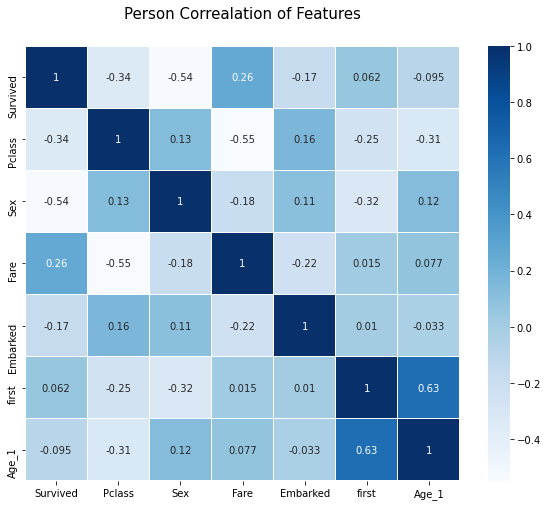

In [50]:
colormap=plt.cm.Blues
plt.figure(figsize=(10,8))
plt.title('Person Correalation of Features',y=1.05,size=15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square=True,cmap=colormap,linecolor='white',annot=True)

## One-hot encoding

In [52]:
train=pd.get_dummies(train,columns=['first'],prefix='first')

In [53]:
test=pd.get_dummies(test,columns=['first'],prefix='first')

In [54]:
train=pd.get_dummies(train,columns=['Embarked'],prefix='Embarked')
test=pd.get_dummies(test,columns=['Embarked'],prefix='Embarked')

In [57]:
train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [58]:
train.head()

,Survived,Pclass,Sex,Fare,Age_1,first_0.0,first_1.0,first_3.0,first_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,7.2500,2,0,0,0,0,0,0,1
1,1,1,0,71.2833,3,0,0,1,0,1,0,0
2,1,3,0,7.9250,2,0,1,0,0,0,0,1
3,1,1,0,53.1000,3,0,0,1,0,0,0,1
4,0,3,1,8.0500,3,0,0,0,0,0,0,1


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [61]:
X_train=train.drop('Survived',axis=1).values
target_label=train['Survived'].values
X_test=test.values

In [62]:
X_tr,X_vid,y_tr,y_vid=train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

In [71]:
model=RandomForestClassifier()
model.fit(X_tr,y_tr)

RandomForestClassifier()

In [72]:
prediction=model.predict(X_vid)

In [83]:
model.score(X_vid, y_vid)

0.8171641791044776

In [86]:
model.feature_importances_

array([0.11535247, 0.16689027, 0.39825155, 0.14290099, 0.0247448 ,
       0.05936836, 0.03854404, 0.00353657, 0.0142151 , 0.01390057,
       0.02229528])

In [87]:
train.head()

,Survived,Pclass,Sex,Fare,Age_1,first_0.0,first_1.0,first_3.0,first_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,7.2500,2,0,0,0,0,0,0,1
1,1,1,0,71.2833,3,0,0,1,0,1,0,0
2,1,3,0,7.9250,2,0,1,0,0,0,0,1
3,1,1,0,53.1000,3,0,0,1,0,0,0,1
4,0,3,1,8.0500,3,0,0,0,0,0,0,1


In [93]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Age_1', 'first_0.0', 'first_1.0',
       'first_3.0', 'first_4.0', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [94]:
test.columns

Index(['Pclass', 'Sex', 'Fare', 'first_0.0', 'first_1.0', 'first_3.0',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [88]:
from pandas import Series

In [91]:
feature_importance=model.feature_importances_
Series_feat_imp=Series(feature_importance,index=test.columns)

ValueError: Length of passed values is 11, index implies 9.